<a href="https://colab.research.google.com/github/coderpawan/UG_project/blob/main/ug_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 32
epochs = 1000
channels = 3
img_height = 256
img_width = 256
learning_rate = 0.0001
val_dir = '/content/drive/MyDrive/LULC/valid'
train_dir = '/content/drive/MyDrive/LULC/train'
test_dir = '/content/drive/MyDrive/LULC/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    horizontal_flip=True,
    zoom_range=0.3
)

In [5]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_data = train_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 21630 images belonging to 10 classes.


In [7]:
val_data = validation_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 2700 images belonging to 10 classes.


In [8]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import Adam



model = Sequential()
model.add(InputLayer(input_shape=(img_height, img_width, channels)))



model.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())



model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))



model.add(Dense(units=10, activation='softmax'))




opt = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                        

In [9]:
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('PKNet.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [11]:
history = model.fit_generator(
    train_data,
    epochs=200,
    validation_data=val_data,
    steps_per_epoch=15,
    validation_steps=10,
    callbacks=[mcp_save]
)

<ipython-input-11-7699f30bd6fe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
15/15 [==============================] - 312s 21s/step - loss: 1.5245 - accuracy: 0.4646 - val_loss: 2.4928 - val_accuracy: 0.1063
Epoch 2/200
15/15 [==============================] - 362s 25s/step - loss: 1.3340 - accuracy: 0.5312 - val_loss: 2.5640 - val_accuracy: 0.1094
Epoch 3/200
15/15 [==============================] - 280s 19s/step - loss: 1.4082 - accuracy: 0.5375 - val_loss: 2.9547 - val_accuracy: 0.1000
Epoch 4/200
15/15 [==============================] - 320s 22s/step - loss: 1.3270 - accuracy: 0.5188 - val_loss: 2.9319 - val_accuracy: 0.1250
Epoch 5/200
15/15 [==============================] - 309s 21s/step - loss: 1.1702 - accuracy: 0.5833 - val_loss: 4.5090 - val_accuracy: 0.1000
Epoch 6/200
15/15 [==============================] - 255s 17s/step - loss: 1.0868 - accuracy: 0.6083 - val_loss: 4.9274 - val_accuracy: 0.1156
Epoch 7/200
15/15 [==============================] - 244s 16s/step - loss: 1.0728 - accuracy: 0.6167 - val_loss: 4.8993 - val_accuracy: 0.0875

In [12]:
import matplotlib.pyplot as plt

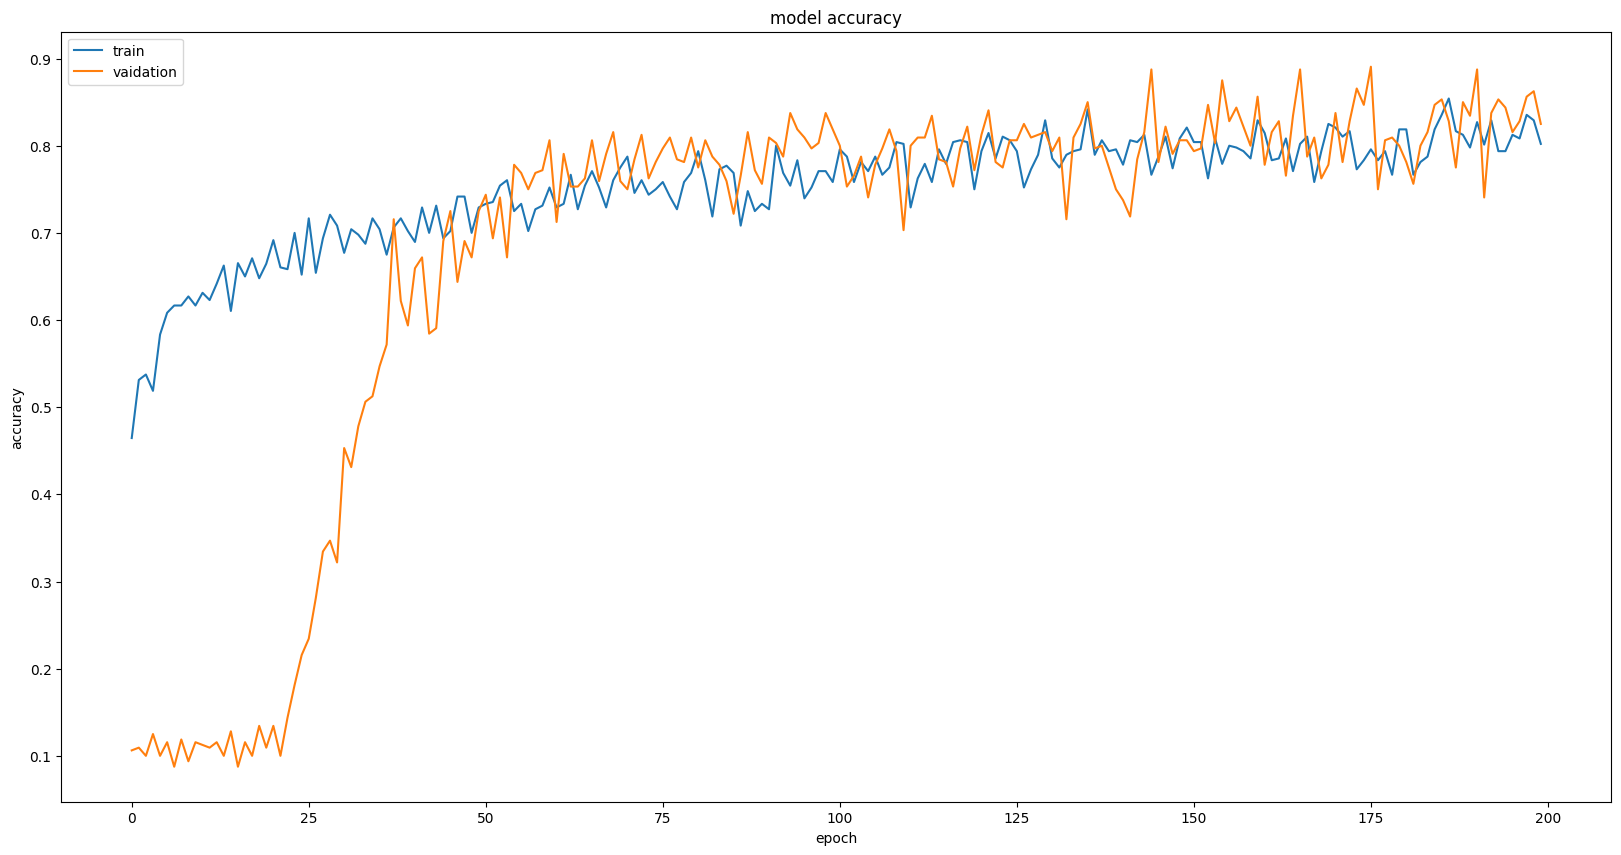

In [13]:
plt.figure(figsize = (20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()

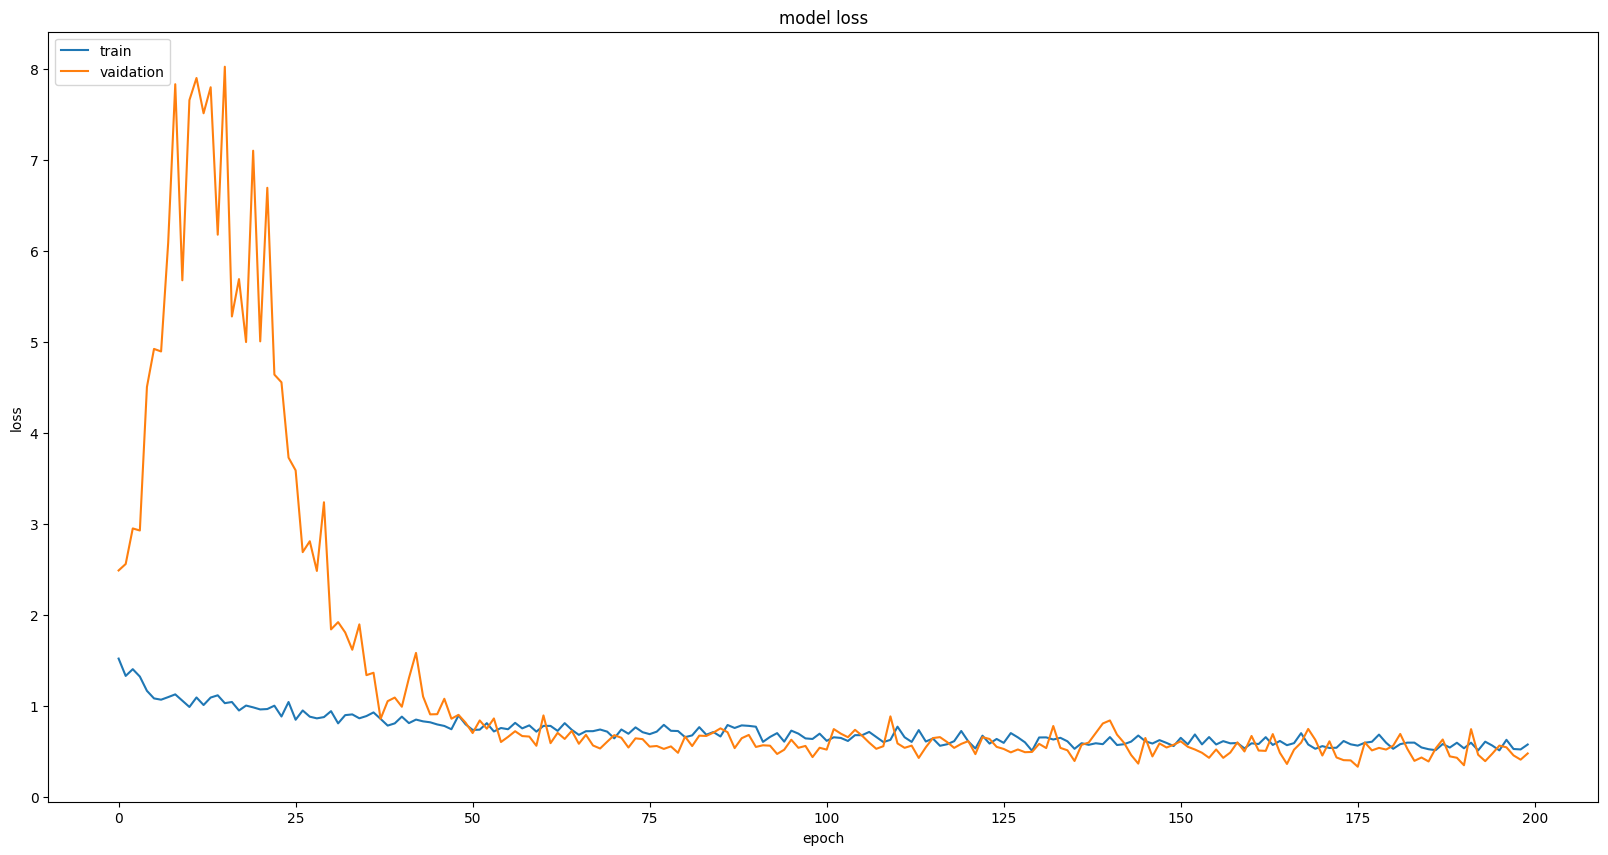

In [14]:
plt.figure(figsize = (20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()

In [15]:
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [16]:
test_data = test_data_generator.flow_from_directory(
    batch_size=1,
    directory=test_dir,
    shuffle=False,
    target_size=(img_height, img_width),
    class_mode='categorical'
)
idx2label_dict = {test_data.class_indices[k]: k for k in test_data.class_indices}


Found 2700 images belonging to 10 classes.


In [17]:
import time 

model.load_weights('PKNet.h5')
inference_times = []
for i in range(5):
    start_time = time.time()
    y_pred = model.predict_generator(test_data, steps=2700).round()
    inference_time = time.time() - start_time
    inference_times.append(inference_time)
# print('Average inference time: %.2f seconds' % (sum(inference_times)/len(inference_times)))
y_true = test_data.classes

<ipython-input-17-31af26b169ce>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data, steps=2700).round()


In [18]:
import numpy as np

y_pred = np.argmax(y_pred, axis = 1)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [20]:
def get_key(mydict,val): 
    for key, value in mydict.items(): 
         if val == value: 
             return key 


In [21]:
def find_metrics(y_true, y_pred, idx2label_dict, class_name):
    cm = confusion_matrix(y_true, y_pred)
    out1 = np.sum(cm, axis = 1)
    out2 = np.sum(cm, axis = 0)
    id = get_key(idx2label_dict, class_name)
    r1 = cm[id][id]/out1[id]
    r2 = cm[id][id]/out2[id]
    s = cm[id][id]
    return (r1, r2, s)

In [22]:
len(y_pred)

2700

In [23]:
import prettytable

table = prettytable.PrettyTable(['Class', 'Recall', 'Precision', 'Accuracy', 'F1 Score'])
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
sum = 0

cm = confusion_matrix(y_true, y_pred)
cm_sum = np.sum(cm)
col_sum = np.sum(cm, axis = 0)
row_sum = np.sum(cm, axis = 1)

class_acc = []

row = len(cm)

for x in range(0,row):
    tp = cm[x][x] 
    fp = row_sum[x] - cm[x][x]
    fn = col_sum[x] - cm[x][x]
    tn = cm_sum - row_sum[x]- col_sum[x] + cm[x][x]

temp = (tp+tn)/(tp+fn+fp+tn)
class_acc.append(temp)

temp = 0    
for _class in class_names:
    result1, result2, s = find_metrics(y_true, y_pred, idx2label_dict, _class)
    sum += s
    f1 = (2*(result1* result2))/ (result1 + result2)
    table.add_row([_class, round(result1, 2), round(result2, 2), round(class_acc[temp], 2), round(f1, 2)])
    
print(table)
print("Accuracy: %.2f" % (sum/2700*100))

+----------------------+--------+-----------+----------+----------+
|        Class         | Recall | Precision | Accuracy | F1 Score |
+----------------------+--------+-----------+----------+----------+
|      AnnualCrop      |  0.92  |    0.52   |   0.99   |   0.67   |
|        Forest        |  0.95  |    0.97   |   0.99   |   0.96   |
| HerbaceousVegetation |  0.64  |    0.85   |   0.99   |   0.73   |
|       Highway        |  0.53  |    0.87   |   0.99   |   0.66   |
|      Industrial      |  0.96  |    0.9    |   0.99   |   0.93   |
|       Pasture        |  0.64  |    0.89   |   0.99   |   0.75   |
|    PermanentCrop     |  0.82  |    0.64   |   0.99   |   0.72   |
|     Residential      |  0.88  |    0.98   |   0.99   |   0.93   |
|        River         |  0.7   |    0.88   |   0.99   |   0.78   |
|       SeaLake        |  0.98  |    0.96   |   0.99   |   0.97   |
+----------------------+--------+-----------+----------+----------+
Accuracy: 81.15


<Axes: >

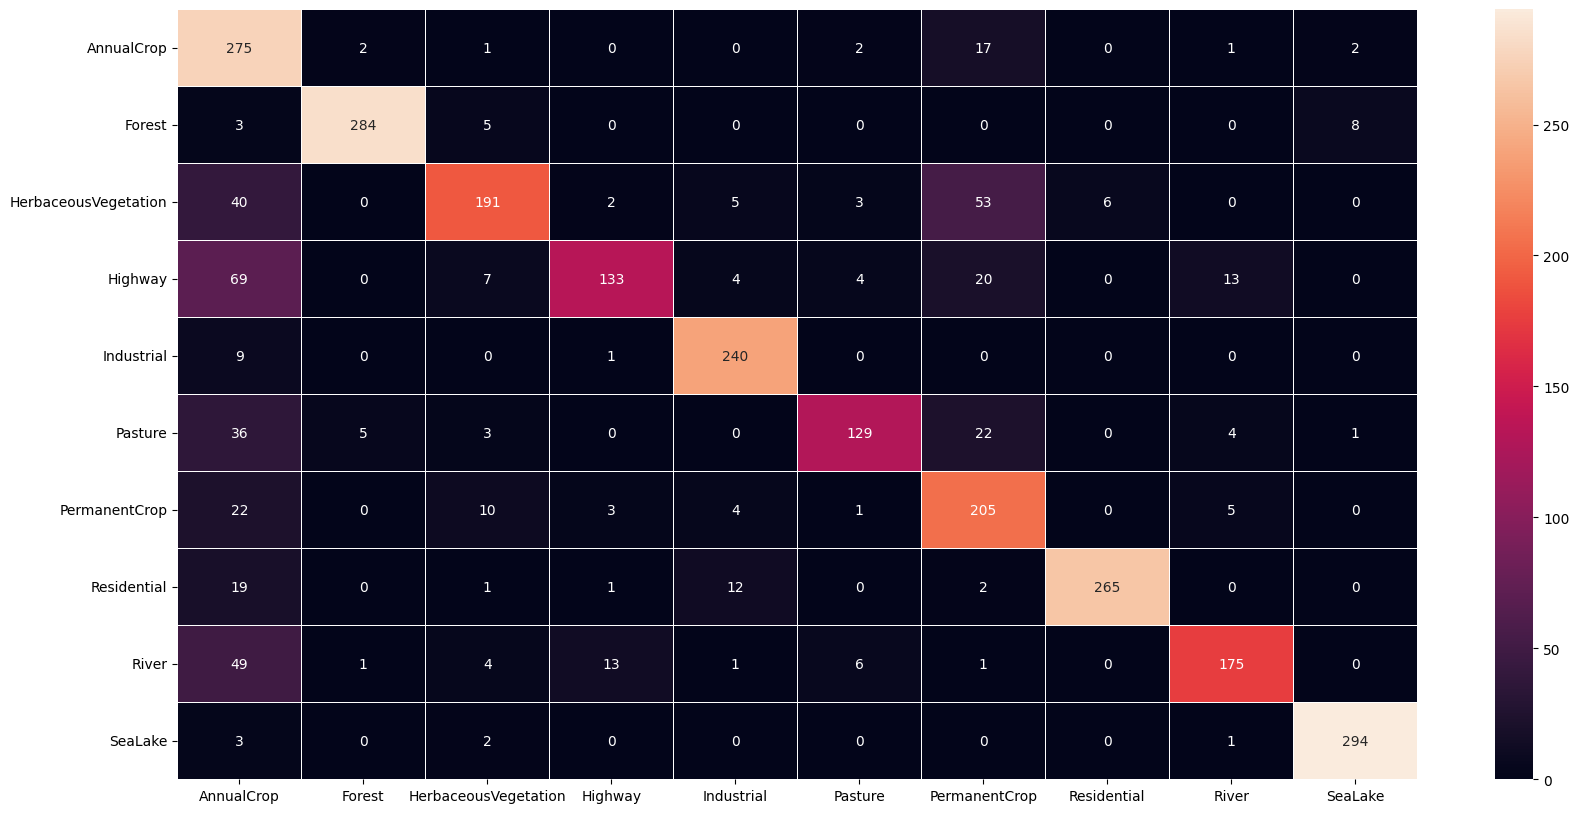

In [24]:
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [idx2label_dict[int(i)] for i in "0123456789"], columns = [idx2label_dict[int(i)] for i in "0123456789"])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, linewidths=.5, fmt="d")